In [1]:
%matplotlib notebook

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp
import csv
sns.set(style="white", color_codes=True)

In [14]:
hepatitis_data = pd.read_csv(r"C:\Users\User\Desktop\hepatitis_csv.csv")
print(hepatitis_data)

     age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0     30    male   False       False   False   False    False     False   
1     50  female   False       False    True   False    False     False   
2     78  female    True       False    True   False    False      True   
3     31  female     NaN        True   False   False    False      True   
4     34  female    True       False   False   False    False      True   
5     34  female    True       False   False   False    False      True   
6     51  female   False       False    True   False     True      True   
7     23  female    True       False   False   False    False      True   
8     39  female    True       False    True   False    False      True   
9     30  female    True       False   False   False    False      True   
10    39  female   False        True   False   False    False     False   
11    32  female    True        True    True   False    False      True   
12    41  female    True 

In [15]:
hepatitis_data.shape

(155, 20)

In [16]:
hepatitis_data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [18]:
hepatitis_data.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [19]:
replacements = {'False': 0,
               'True': 1,
               'die': 0,
               'live': 1,
               '?': np.NaN,
               'female': 0,
               'male': 1}

hepatitis_data.replace(replacements, inplace = True)

In [20]:
hepatitis_data = hepatitis_data.astype(float)

In [22]:
total_of_patients = hepatitis_data.shape[0]
total_of_live_patients = (np.sum(hepatitis_data['class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(hepatitis_data['class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


In [23]:
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']
hepatitis_data[numerical_variables].describe()

,age,bilirubin,protime,albumin,alk_phosphate,sgot
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [25]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
hepatitis_data[categorical_variables].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


In [26]:
hepatitis_analysis = hepatitis_data.dropna()
interesting_values_x = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


<IPython.core.display.Javascript object>


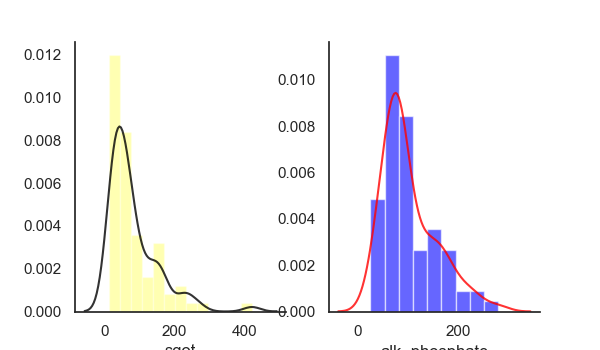

In [29]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['sgot'],
             kde_kws={"color":"black","lw":1.5,"alpha":0.8},
             hist_kws={"color":"yellow","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"blue","alpha":0.6})
sns.despine();

<IPython.core.display.Javascript object>


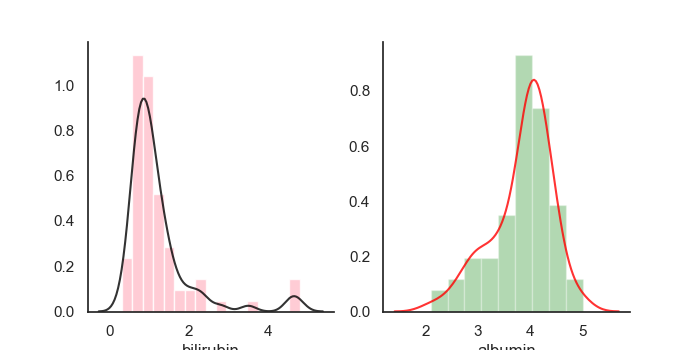

In [30]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['bilirubin'],
             kde_kws={"color":"black","lw":1.5,"alpha":0.8},
             hist_kws={"color":"pink","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
sns.despine();

<IPython.core.display.Javascript object>


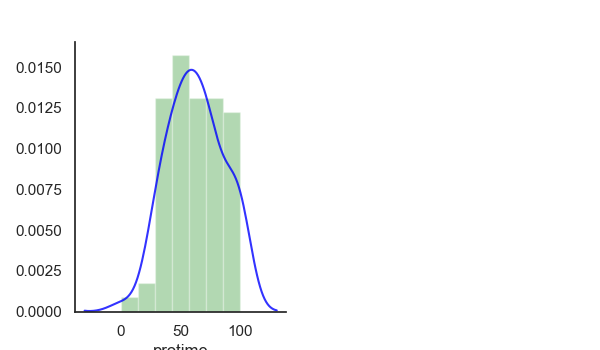

In [31]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['protime'], 
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
sns.despine();

In [32]:
hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


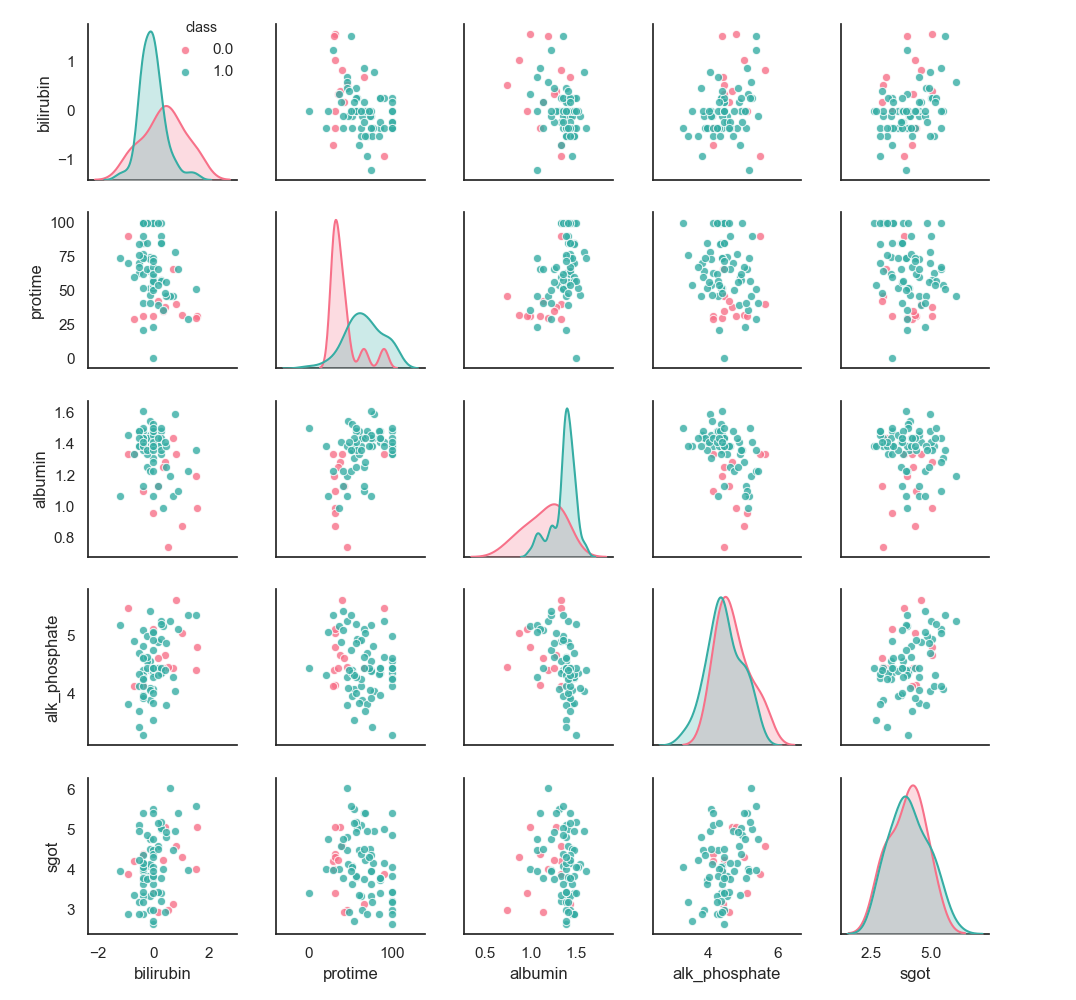

In [34]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

<IPython.core.display.Javascript object>


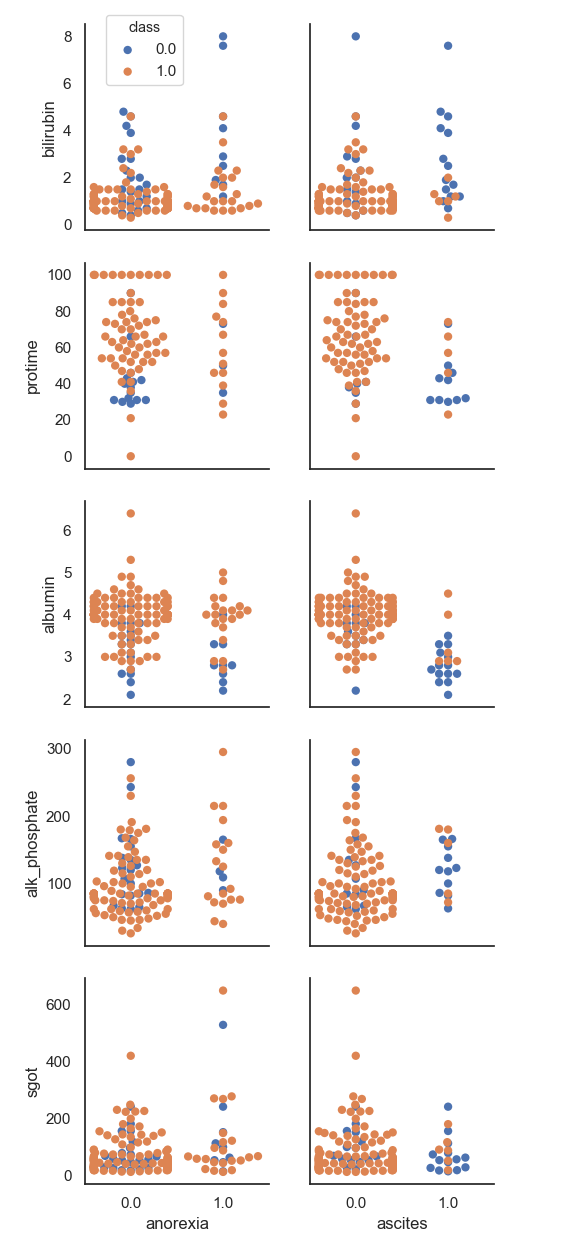

In [37]:
graph = sns.PairGrid(hepatitis_data,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

In [38]:
hepatitis_data[categorical_variables] = hepatitis_data[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [39]:
corr = hepatitis_data.dropna().corr(method = 'pearson')

<IPython.core.display.Javascript object>


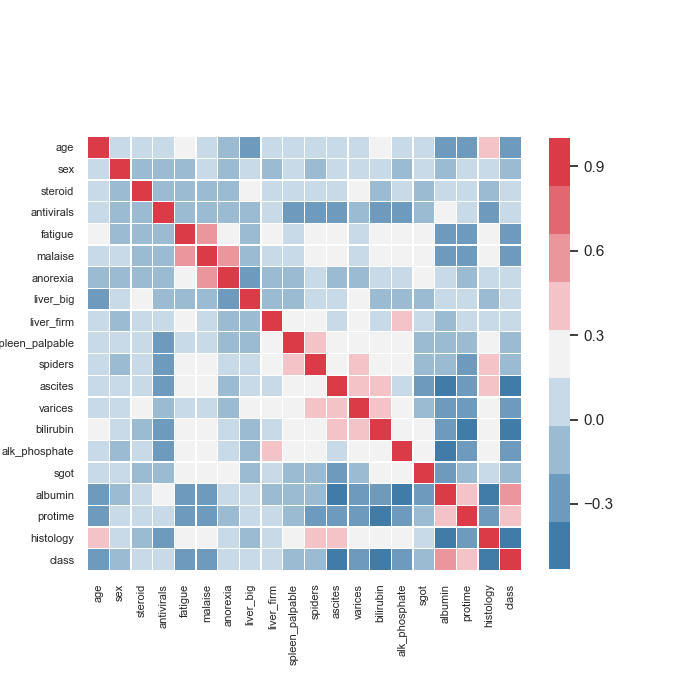

In [40]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);
